In [61]:
# Kindly change the below cells from markdown to code and execute it 
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [64]:
df_soilhealth=pd.read_excel("EDA_SOilHealth.xlsx")

df_soilhealth.head()

,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),Na 2+ (meq/100 gram),...,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD,SQI
0,4.5,0.59,0.94,412.69,21.76,110.07,10.2,2.15,1.34,0.24,...,44.303797,41.5,9.52,30.52,5.46,25.06,49.602941,50.397059,1.819625,0.800230
1,5.1,0.59,1.03,450.25,32.68,287.07,10.2,1.53,1.16,0.31,...,44.155844,37.5,8.12,31.22,6.52,24.70,36.814462,63.185538,2.100144,0.791114
2,4.9,0.61,0.97,454.23,34.68,228.46,10.7,1.81,1.45,0.28,...,43.497758,36.4,7.52,30.26,6.48,23.78,36.961538,63.038462,2.074770,0.810275
3,4.5,0.68,0.65,282.56,14.28,155.30,8.5,1.64,0.52,0.19,...,47.698745,38.2,8.12,33.43,7.55,25.88,43.197964,56.802036,1.837323,0.670725
4,4.4,0.64,0.66,298.82,12.34,83.12,8.8,1.66,0.72,0.19,...,51.452282,36.0,7.46,30.41,4.65,25.76,45.608295,54.391705,1.960723,0.695252


In [65]:
# Dependant (Target) Variable:
y = df_soilhealth['SQI']
# Independant Variables:
df_soilhealth_new = df_soilhealth.drop(['SQI'],axis=1)

X = df_soilhealth.drop(['SQI'],axis=1)
X.head()

,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),Na 2+ (meq/100 gram),...,BD (gm/cm3)** core method,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD
0,4.5,0.59,0.94,412.69,21.76,110.07,10.2,2.15,1.34,0.24,...,1.32,44.303797,41.5,9.52,30.52,5.46,25.06,49.602941,50.397059,1.819625
1,5.1,0.59,1.03,450.25,32.68,287.07,10.2,1.53,1.16,0.31,...,1.29,44.155844,37.5,8.12,31.22,6.52,24.70,36.814462,63.185538,2.100144
2,4.9,0.61,0.97,454.23,34.68,228.46,10.7,1.81,1.45,0.28,...,1.26,43.497758,36.4,7.52,30.26,6.48,23.78,36.961538,63.038462,2.074770
3,4.5,0.68,0.65,282.56,14.28,155.30,8.5,1.64,0.52,0.19,...,1.25,47.698745,38.2,8.12,33.43,7.55,25.88,43.197964,56.802036,1.837323
4,4.4,0.64,0.66,298.82,12.34,83.12,8.8,1.66,0.72,0.19,...,1.17,51.452282,36.0,7.46,30.41,4.65,25.76,45.608295,54.391705,1.960723


In [66]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [67]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [68]:
finalDf = pd.concat([principalDf, df_soilhealth[['SQI']]], axis = 1)

In [69]:
print("original shape:   ", X.shape)
print("transformed shape:", principalComponents.shape)

original shape:    (126, 31)
transformed shape: (126, 5)


In [70]:
finalDf

,PC1,PC2,PC3,PC4,PC5,SQI
0,6.408915,0.891283,-1.397242,2.234543,-1.524421,0.800230
1,5.250613,-2.803161,-0.656002,-1.102555,-2.359955,0.791114
2,5.777218,-2.556763,-0.573408,-0.228261,-2.160938,0.810275
3,5.173637,0.349077,-0.858553,0.179771,0.444496,0.670725
4,5.532463,1.455832,-0.508279,-0.205909,1.623346,0.695252
...,...,...,...,...,...,...
121,-1.811536,3.014758,1.269163,-1.242938,-2.162333,0.511975
122,-0.998398,5.639900,-0.460896,-0.224151,-1.619074,0.486181
123,-1.437240,4.278182,1.041118,-0.806813,-2.340859,0.497533
124,-1.414591,3.860683,1.656236,-2.071873,-2.482625,0.501631


In [71]:
print(pca.components_)

[[-0.2021941   0.10029626 -0.00429377  0.00690123 -0.13748535 -0.09794398
   0.29228288  0.22592663  0.06883513  0.02751413 -0.16224465  0.16331878
   0.03512772  0.20265213  0.03825609 -0.16652304 -0.2957328   0.25956785
   0.27869053 -0.2648182  -0.23788643 -0.19677328  0.0185459   0.27558314
   0.1289794   0.24500973 -0.15302975  0.27014792  0.04824137 -0.04824137
   0.045714  ]
 [-0.14747188 -0.35901163 -0.37668095 -0.31686811  0.03223291 -0.21144316
   0.02385855 -0.00752415 -0.10647532 -0.24411079 -0.23408009  0.23180864
  -0.0210129   0.06057236 -0.16603941  0.05495314  0.04461204 -0.10890605
   0.02698806 -0.11956931  0.11463733  0.11131926 -0.02007356 -0.08453584
  -0.01946795 -0.15449061 -0.26570442 -0.0741597   0.29015623 -0.29015623
  -0.12591833]
 [ 0.25192706  0.092059    0.05100248  0.09601932 -0.37502902 -0.38977013
   0.00611938 -0.1117128  -0.001824   -0.20175337 -0.34774419  0.00349259
  -0.05826584 -0.09796497  0.21567913  0.1087185   0.03850364 -0.1753828
   0.1013

In [72]:
print(pca.explained_variance_ratio_)

[0.33040528 0.12175985 0.08076275 0.07909871 0.06216679]


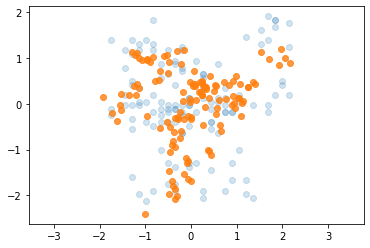

In [73]:
X_new = pca.inverse_transform(principalComponents)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [74]:
# number of components
n_pcs= pca.components_.shape[0]

In [75]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_soilhealth.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [76]:
df

,0,1
0,PC1,SAND (%)
1,PC2,OC (%)
2,PC3,Available K 20 (kg/ha )
3,PC4,MWD
4,PC5,Total porosity(%)
